In [226]:
import numpy as np
import sys
sys.path.append('../')
from cycada.data.data_loader import get_dataset
import PIL.Image as Image
from os.path import join
import os

In [95]:
from torchvision import datasets

mnist_dataset = datasets.MNIST('/x/jhoffman/mnist/', train=True, transform=None, 
                               target_transform=None, download=True)
svhn_dataset = datasets.SVHN('/x/jhoffman/svhn/', split='train', transform=None, 
                             target_transform=None, download=True)

Using downloaded and verified file: /x/jhoffman/svhn/train_32x32.mat


In [233]:
outdir = '/x/jhoffman/cyclegan_data/svhn2mnist'
# SVHN->MNIST: convert to 32x32x3 images

os.makedirs(join(outdir, 'trainB/images'), exist_ok=True)
with open(join(outdir, 'trainB/labels.txt'), 'w') as label_file:
    for i in range(len(mnist_dataset)):
        img = Image.fromarray(mnist_dataset.train_data[i].numpy())
        img = img.resize([32,32])
        img = img.convert('RGB')
        img.save(join(outdir, 'trainB/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, mnist_dataset.train_labels[i]))
     

os.makedirs(join(outdir, 'trainA/images'), exist_ok=True)
svhn_labels = svhn_dataset.labels.flatten()
with open(join(outdir, 'trainA/labels.txt'), 'w') as label_file:
    for i in range(len(svhn_dataset)):
        img = Image.fromarray(svhn_dataset.data[i].transpose(1,2,0))
        img.save(join(outdir, 'trainA/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, svhn_labels[i]))

In [146]:
# CUDA_VISIBLE_DEVICES=1 python train.py --name experiment_name 
# --dataroot path_to_gta2cityscape --resize_or_crop=crop --loadSize=360 --fineSize=360 --identity 1.0 
# --which_model_netD n_layers --n_layers_D 3

In [147]:
#CUDA_VISIBLE_DEVICES=1 python cyclegan/train.py --name test_svhn2mnist 
# --dataroot /x/jhoffman/cyclegan_data/svhn2mnist/ --resize_or_crop=None 
# --loadSize=32 --fineSize=32 --which_model_netD n_layers --n_layers_D 3 --no_flip
# --model cycle_gan --lambda_A 1 --lambda_B 1 --identity 1.0

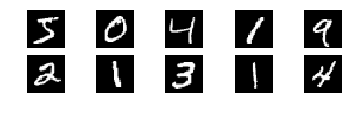

In [154]:
dirname = join(outdir, 'trainB')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

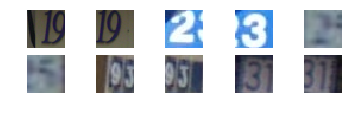

In [155]:
dirname = join(outdir, 'trainA')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

In [160]:
y = svhn_dataset.labels

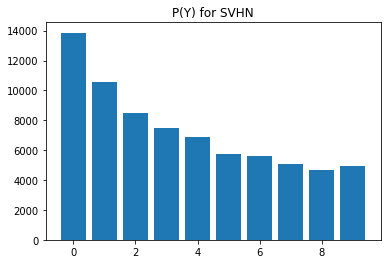

In [171]:
count,bins = np.histogram(y.squeeze(), bins=10)
plt.bar(range(10), count); plt.title('P(Y) for SVHN')

In [210]:
min_num = min(count)
ind = np.zeros((10,min_num), dtype=int)
for i in np.unique(y):
    binary_ind = np.where(y.squeeze() == i)[0]
    np.random.shuffle(binary_ind)
    
    ind[i-1,:] = binary_ind[:min_num]

ind = ind.flatten()
np.random.shuffle(ind)
y_new = y[ind]

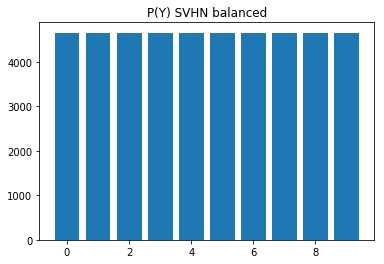

In [214]:
count_new,_ = np.histogram(y_new, bins=10)
plt.bar(range(10), count_new); plt.title('P(Y) SVHN balanced')

In [248]:
with open('/x/jhoffman/cyclegan_data/svhn2mnist/trainA/labels.txt', 'r') as f:
    data = f.read().splitlines()

parse = np.array([(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in data])
d = dict(parse)